## Imports

1 Business Understanding
2 Data understanding
3 Prepare data
4 Model data
5 Results

In [17]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.creation import CyclicalFeatures

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None) 

In [18]:
# load data
data = pd.read_csv('/Users/bethbarlow/Documents/Nanodegree/udacity_ds_nanodegree_capstone/data/corporate_rating.csv')

### Data Exporation

In [19]:
data.tail() # remove Symbol from dataframe

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,assetTurnover,fixedAssetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
2024,BBB,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,0.077844,0.069328,0.112672,0.121980,1.222589,10306.310680,0.759461,0.431644,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,-0.169983,-0.267117,0.198649,-0.248509,-0.189265,-0.344004,-0.305527,1.113431,2.809649,0.614282,0.380530,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,147.599371,-0.007458,0.000219,0.384390,0.185418,-0.002066,0.091267,-0.008335,0.276986,1.526947,2.201516,0.545612,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,0.087365,0.130692,0.414916,0.286236,0.021251,0.040450,0.081303,0.243244,1.284950,1.917192,0.501115,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608
2028,CCC,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,8/1/2014,Finance,1.085007,1.026375,0.203490,151.660513,-0.231972,-0.316464,0.396612,0.207428,-0.037150,0.058567,-0.146341,0.160150,0.247647,2.154152,0.546855,0.266987,1.101462,2.487817,6.109814,3.939161,0.302997,9.604061,2.258650,0.252606,1.865682


In [20]:
# check distributions of numerical variables
data.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,assetTurnover,fixedAssetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,143.494296,3.678340e+03,7.269487e+03,2.328306,0.661495,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,4406.515045,9.565410e+04,1.889967e+05,87.528880,0.208921,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,-63.814815,-9.157477e+00,-2.679777e+01,-2556.419643,0.000000,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,0.050254,3.872355e-01,1.019889e+00,1.044617,0.535562,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,0.122383,6.983455e-01,3.811684e+00,1.652456,0.640915,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,0.201652,1.096211e+00,8.518476e+00,2.635023,0.749869,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,141350.211000,2.553149e+06,5.156884e+06,2561.871795,1.927839,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


In [21]:
data.columns, data.shape, data.dtypes

(Index(['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
        'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
        'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
        'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
        'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
        'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
        'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
        'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
        'enterpriseValueMultiple', 'operatingCashFlowPerShare',
        'operatingCashFlowSalesRatio', 'payablesTurnover'],
       dtype='object'),
 (2029, 31),
 Rating                                 object
 Name                                   object
 Symbol                                 object
 Rating Agency Name                     object
 Date                                   object
 Sector                                

In [22]:
# check percentage of each column missing 
data.isna().sum()/len(data) # no missing data

Rating                                0.0
Name                                  0.0
Symbol                                0.0
Rating Agency Name                    0.0
Date                                  0.0
Sector                                0.0
currentRatio                          0.0
quickRatio                            0.0
cashRatio                             0.0
daysOfSalesOutstanding                0.0
netProfitMargin                       0.0
pretaxProfitMargin                    0.0
grossProfitMargin                     0.0
operatingProfitMargin                 0.0
returnOnAssets                        0.0
returnOnCapitalEmployed               0.0
returnOnEquity                        0.0
assetTurnover                         0.0
fixedAssetTurnover                    0.0
debtEquityRatio                       0.0
debtRatio                             0.0
effectiveTaxRate                      0.0
freeCashFlowOperatingCashFlowRatio    0.0
freeCashFlowPerShare              

In [23]:
# check classes and balance of data
data.Rating.value_counts() # 'Rating' column should be reclassified to balance categories

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

In [24]:
data['Sector'].value_counts() #relatively even distribution of sectors

Energy                   294
Basic Industries         260
Consumer Services        250
Technology               234
Capital Goods            233
Public Utilities         211
Health Care              171
Consumer Non-Durables    132
Consumer Durables         74
Transportation            63
Miscellaneous             57
Finance                   50
Name: Sector, dtype: int64

In [25]:
data['Rating Agency Name'].value_counts() # remove DBRS from dataset

Standard & Poor's Ratings Services    744
Egan-Jones Ratings Company            603
Moody's Investors Service             579
Fitch Ratings                         100
DBRS                                    3
Name: Rating Agency Name, dtype: int64

### Data Visualisation

<AxesSubplot:xlabel='Rating'>

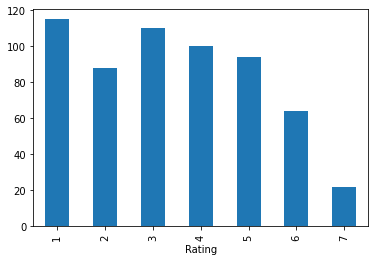

In [26]:
# number of ratings per company - should company Name be included as a variable?

rating_count = pd.DataFrame(data.groupby('Name')['Rating'].count()).reset_index()
rating_count_groups = rating_count.groupby('Rating')['Name'].count()
rating_count_groups.plot(kind='bar')

# should remove company name - adds no information

In [27]:
#Change date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract day, month and year from date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [28]:
category_order_list = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
data['Rating'] = data['Rating'].astype('category')

data["Rating"] = data["Rating"].cat.set_categories(category_order_list, ordered=True)

<AxesSubplot:xlabel='Month,None'>

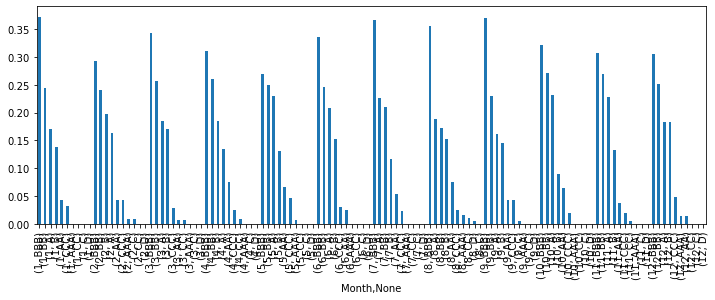

In [29]:
fig, ax = plt.subplots(figsize=(12, 4))
average_month_rating = data.groupby(["Month"])["Rating"].value_counts(normalize = True)
average_month_rating.plot(kind = 'bar')

In [30]:
# define numerical columns
numerical_cols = data.select_dtypes(include=['float64']).columns.tolist()

In [31]:
# plot distributions of all variables
# numerical_cols = data.select_dtypes(include=['float64']).columns.tolist()
# for col in numerical_cols:
#     plt.figure()
#     plt.boxplot(data[col])

In [32]:
# drop outliers for purpose of EDA using Tukey Rule

def tukey_rule(dataframe, column_name_list):
    
    '''
    Detects outliers using the Tukey rule and removes entire row from dataframe
    
    Inputs: 
    dataframe - dataframe
    column_name_list - list of columns to be assessed for outliers
    
    Outputs:
    data_winz - dataframe with outlier rows removed
    
    '''
    
    data_winz = dataframe.copy()
    perc_outliers = []
    
    for col in column_name_list:

        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)

        IQR = Q3-Q1

        max_value = Q3 + 1.5 * IQR
        min_value = Q1 - 1.5 * IQR
        
        # Calculate percentage of each column that is outwith max and min Tukey values
        perc_outliers.append(100 * len(dataframe[(dataframe[col] > max_value) | (dataframe[col] < min_value)][col])/len(dataframe[col]))
        
        # Winzorize columns based on using Tukey fences to remove outliers for data exploration
        data_winz[col] = data_winz[col].clip(min_value, max_value)
    
    return data_winz, perc_outliers


In [33]:
data_winz, perc_outliers = tukey_rule(data, numerical_cols)

In [34]:
outlier_comparison = pd.DataFrame()
outlier_comparison['col'] = numerical_cols
outlier_comparison['mean_outliers'] = data[numerical_cols].mean().values
outlier_comparison['mean_data_winz'] = data_winz[numerical_cols].mean().values

outlier_comparison['perc_outliers'] = perc_outliers
outlier_comparison.sort_values('perc_outliers', ascending = False) # no impact on mean values by winzorzing data

,col,mean_outliers,mean_data_winz,perc_outliers
10,returnOnEquity,143.494296,0.125372,15.524889
13,debtEquityRatio,2.328306,1.958219,13.947758
19,companyEquityMultiplier,3.323579,2.962596,13.652045
15,effectiveTaxRate,0.397572,0.259872,12.025628
5,pretaxProfitMargin,0.431483,0.089040,11.631345
4,netProfitMargin,0.278447,0.069567,11.434204
20,ebitPerRevenue,0.437454,0.092958,11.089207
21,enterpriseValueMultiple,48.287985,9.866521,11.039921
18,cashPerShare,4227.548561,5.674842,10.103499
17,freeCashFlowPerShare,5094.718642,2.538900,9.955643


In [35]:
# fig, ax = plt.subplots(figsize = (15, 5))
# sns.countplot(x = data_winz['Rating Agency Name'].values, data=data_winz)
# ax.set_title("Number of Credit Ratings per Ratings Agency")
# plt.show()

# result - remove DBRS from dataset

<AxesSubplot:xlabel='Rating'>

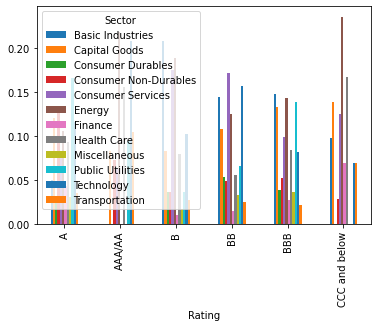

In [36]:
data_winz['Rating'] = data_winz['Rating'].replace({'AA':'AAA/AA', 'AAA':'AAA/AA', 'CCC': 'CCC and below', 'CC': 'CCC and below', 'C':'CCC and below', 'D':'CCC and below'})
data.Rating.value_counts()
CrosstabResult=pd.crosstab(index=data_winz['Rating'],columns=data_winz['Sector'], normalize = 'index')
CrosstabResult.plot.bar()
#plt.legend('', frameon=False)

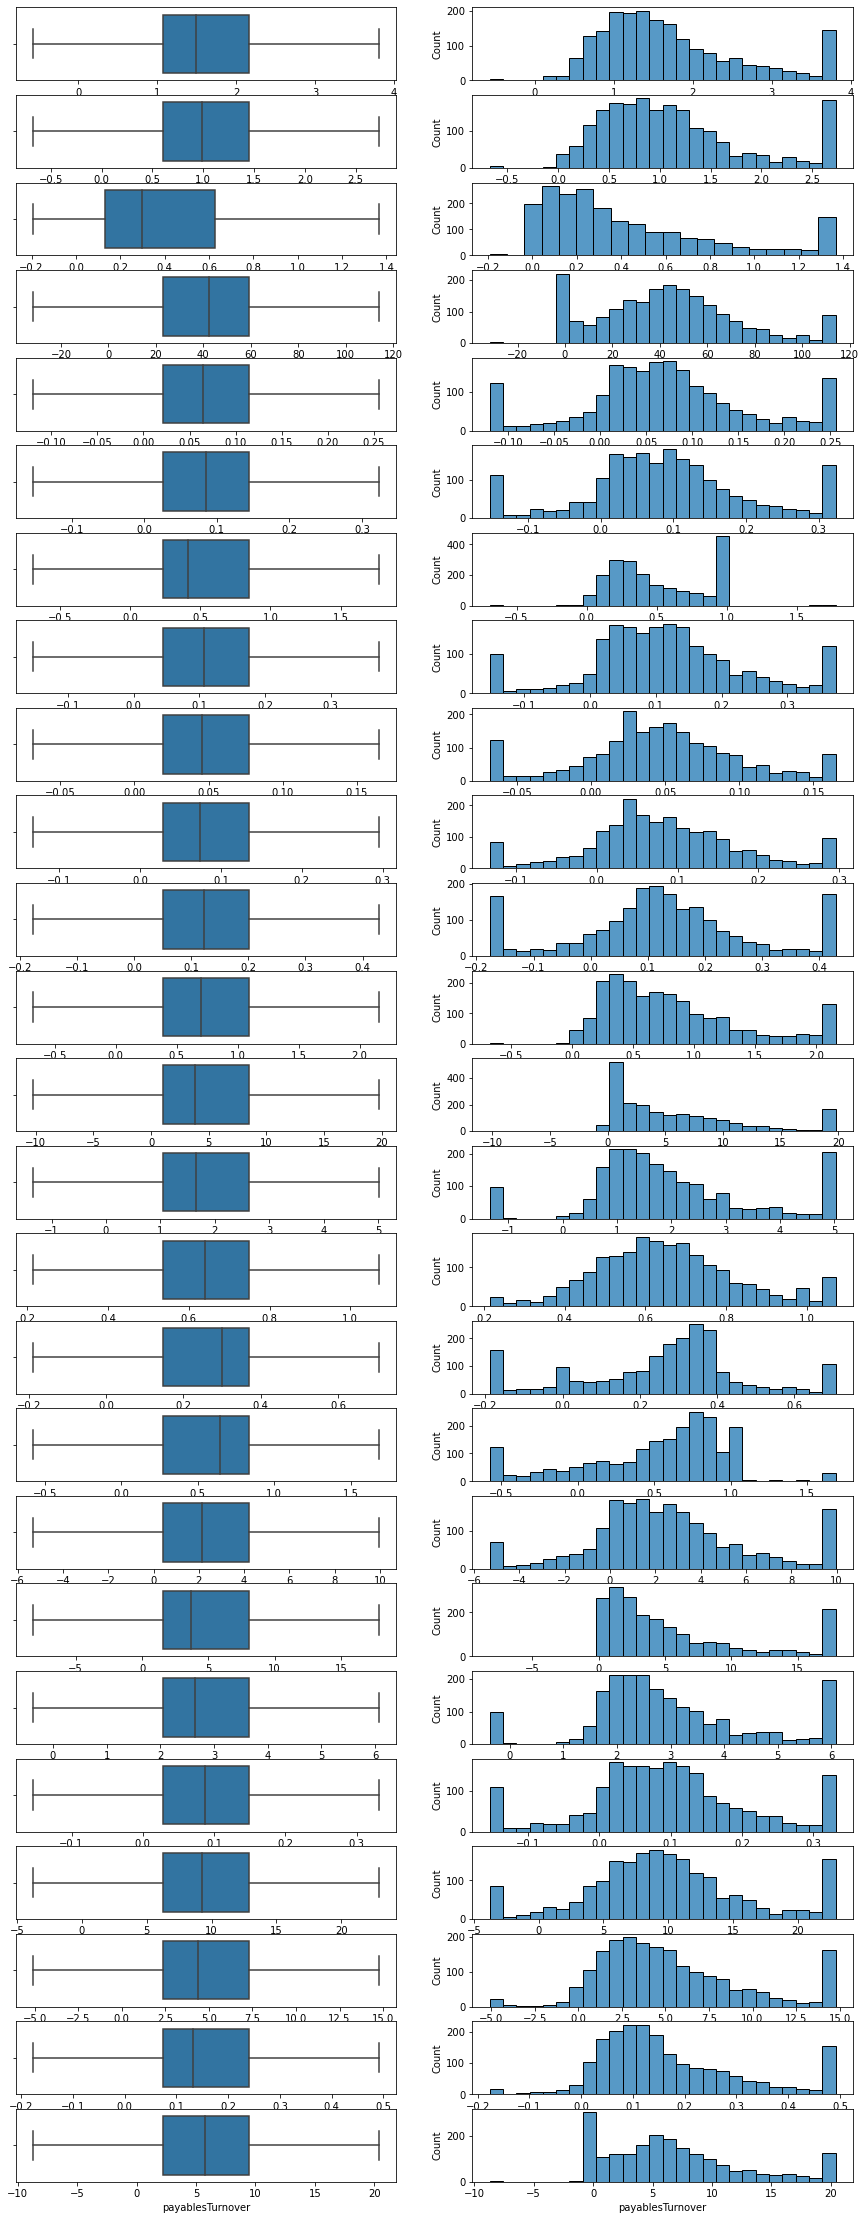

In [37]:
fig, ax = plt.subplots(25, 2, figsize = (15, 40))

count = 0
for col in data_winz[numerical_cols].columns:
    
    sns.boxplot(x= data_winz[col], ax = ax[count,0])
    sns.histplot(data_winz[col], ax = ax[count,1])
    count += 1

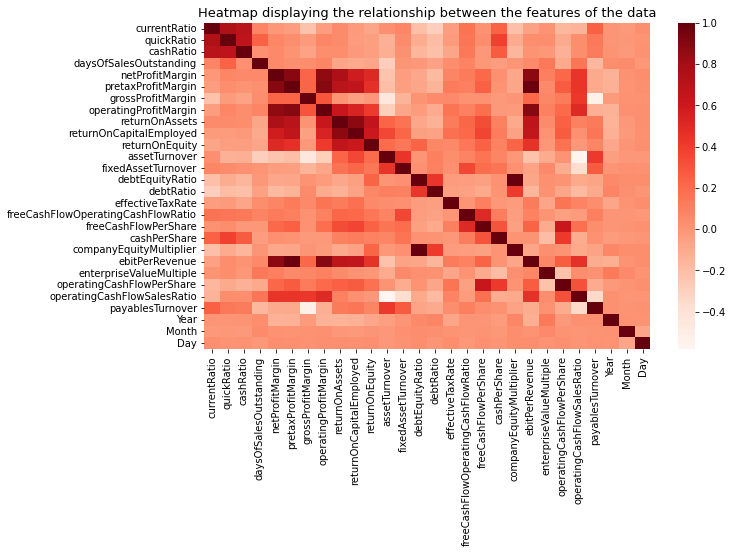

In [38]:
#correlation between the variables
corr_matrix = data_winz.corr().abs()
plt.figure(figsize=(10,6))
sns.heatmap(data_winz.corr(),cmap=plt.cm.Reds,annot=False)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

In [39]:
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort", ascending = False)[25:55]
so
# Remove companyEquityMultiplier, pretaxProfitMargin, ebitPerRevenue, returnOnCapitalEmployed
# quickRatio

Month                    Month                      1.000000
cashRatio                cashRatio                  1.000000
Day                      Day                        1.000000
debtEquityRatio          companyEquityMultiplier    0.994146
companyEquityMultiplier  debtEquityRatio            0.994146
ebitPerRevenue           pretaxProfitMargin         0.984156
pretaxProfitMargin       ebitPerRevenue             0.984156
operatingProfitMargin    ebitPerRevenue             0.899682
ebitPerRevenue           operatingProfitMargin      0.899682
operatingProfitMargin    pretaxProfitMargin         0.896706
pretaxProfitMargin       operatingProfitMargin      0.896706
netProfitMargin          pretaxProfitMargin         0.893918
pretaxProfitMargin       netProfitMargin            0.893918
returnOnAssets           returnOnCapitalEmployed    0.881479
returnOnCapitalEmployed  returnOnAssets             0.881479
ebitPerRevenue           netProfitMargin            0.880681
netProfitMargin         

In [52]:
data_winz_trim = data_winz.drop(columns = ['companyEquityMultiplier', 'pretaxProfitMargin', 'returnOnCapitalEmployed',
                                     'ebitPerRevenue', 'quickRatio'])

In [53]:
# recheck correlation
corr_matrix_trim = data_winz_trim.corr().abs()
s = corr_matrix_trim.unstack()
so = s.sort_values(kind="quicksort", ascending = False)[25:55]

### Data Pre-processing

In [54]:
#Change date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract day, month and year from date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# convert Year, Month and Day into cyclical variables
cyclical = CyclicalFeatures(variables=['Year', 'Month', 'Day'], drop_original=True)
data = cyclical.fit_transform(data)

#Remove 'Date', 'Symbol' and 'Name' columns
data.drop(columns = ['Date', 'Symbol', 'Name'], inplace = True)

# Remove DBRS Rating Agency from dataset
data_trim = data[data['Rating Agency Name'] != 'DBRS']
data_trim['Rating Agency Name'].value_counts()

# Remove highly correlated columns
data_trim= data_trim.drop(columns = ['companyEquityMultiplier', 'pretaxProfitMargin', 'returnOnCapitalEmployed',
                                     'ebitPerRevenue', 'quickRatio'])

KeyError: 'Date'

In [55]:
# Reclassify 'Rating' column due to few data points for some categories
data_trim['Rating'] = data_trim['Rating'].replace({'AA':'AAA/AA', 'AAA':'AAA/AA', 'CCC': 'CCC and below', 'CC': 'CCC and below', 'C':'CCC and below', 'D':'CCC and below'})
data_trim.Rating.value_counts()

BBB              670
BB               490
A                398
B                302
AAA/AA            94
CCC and below     72
Name: Rating, dtype: int64

In [47]:
data_fin = data_trim

In [48]:
# One hot encoding of categorical variables
# encoder = OneHotEncoder(handle_unknown='ignore')
# encoder_df = pd.DataFrame(encoder.fit_transform(data_trim[['Rating Agency Name', 'Sector']]).toarray())

# encoder_df.columns = encoder.get_feature_names()

# encoder_df.columns = encoder.get_feature_names()
# data_fin = data_trim.join(encoder_df)
# data_fin.drop(columns = ['Rating Agency Name', 'Sector'], axis=1, inplace=True)
# data_fin.drop(data_fin.tail(3).index, inplace = True)

In [49]:
# save output
data_fin.to_csv('/Users/bethbarlow/Documents/Nanodegree/udacity_ds_nanodegree_capstone/data/data_preproc.csv')

In [50]:
data_fin.head()

,Rating,Rating Agency Name,Sector,currentRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnEquity,assetTurnover,fixedAssetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Year_sin,Year_cos,Month_sin,Month_cos,Day_sin,Day_cos
0,A,Egan-Jones Ratings Company,Consumer Durables,0.945894,0.099690,44.203245,0.037480,0.176631,0.061510,0.041189,0.165085,1.098948,5.535506,3.008012,0.750500,0.202716,0.437551,6.810673,9.809403,7.057088,15.565438,0.058638,3.906655,-3.116654e-03,0.999995,-5.000000e-01,8.660254e-01,-0.724793,0.688967
1,BBB,Egan-Jones Ratings Company,Consumer Durables,1.033559,0.203120,38.991156,0.044062,0.175715,0.066546,0.053204,0.167953,1.207476,6.171983,2.156783,0.683222,0.074155,0.541997,8.625473,17.402270,6.460618,15.914250,0.067239,4.002846,-6.233278e-03,0.999981,8.660254e-01,5.000000e-01,0.485302,-0.874347
2,BBB,Fitch Ratings,Consumer Durables,0.963703,0.122099,50.841385,0.032709,0.170843,0.059783,0.032497,0.133060,0.993501,4.991711,3.094575,0.755774,0.214529,0.513185,9.693487,13.103448,10.491970,18.888889,0.074426,3.483510,-3.116654e-03,0.999995,1.000000e+00,6.123234e-17,0.937752,0.347305
3,BBB,Fitch Ratings,Consumer Durables,1.019851,0.176116,41.161738,0.020894,0.138059,0.042430,0.025690,0.093279,1.229563,6.017408,2.630950,0.724590,1.816667,-0.147170,-1.015625,14.440104,4.080741,6.901042,0.028394,4.581150,-1.246631e-02,0.999922,1.224647e-16,-1.000000e+00,0.101168,-0.994869
4,BBB,Standard & Poor's Ratings Services,Consumer Durables,0.957844,0.141608,47.761126,0.042861,0.177720,0.065354,0.046363,0.186047,1.081710,5.437795,3.012780,0.750796,0.166966,0.451372,7.135348,14.257556,8.293505,15.808147,0.058065,3.857790,-2.449294e-16,1.000000,-8.660254e-01,5.000000e-01,-0.988468,0.151428
